In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [41]:
data = pd.read_csv('STATcompilerExport20241111_12156.csv')
data.head()
data.columns

Index(['Country', 'Survey', 'Characteristic',
       'Breastfed children 6-23 months fed both 4+ food groups and the minimum meal frequency',
       'Number of breastfed children 6-23 months',
       'Number of breastfed children 6-23 months (unweighted)',
       'Non-breastfed children 6-23 months fed milk or milk products',
       'Non-breastfed children 6-23 months with 3 IYCF practices',
       'Number of nonbreastfed children 6-23 months',
       'Number of nonbreastfed children 6-23 months (unweighted)',
       'Children 6-23 months fed 5+ food groups',
       'Children 6-23 months fed the minimum meal frequency',
       'Children 6-23 months with 3 IYCF practices',
       'Number of all children 6-23 months',
       'Number of all children 6-23 months (unweighted)'],
      dtype='object')

In [44]:
columns_of_interest = [
    'Characteristic',
    'Breastfed children 6-23 months fed both 4+ food groups and the minimum meal frequency',
    'Children 6-23 months fed 5+ food groups',
    'Children 6-23 months fed the minimum meal frequency',
    'Children 6-23 months with 3 IYCF practices'
]

filtered_data = data[columns_of_interest]

filtered_data

,Characteristic,Breastfed children 6-23 months fed both 4+ food groups and the minimum meal frequency,Children 6-23 months fed 5+ food groups,Children 6-23 months fed the minimum meal frequency,Children 6-23 months with 3 IYCF practices
0,Total,33.3,36.9,70.9,30.7
1,Sex : Male,33.0,36.9,69.2,30.8
2,Sex : Female,33.7,37.0,72.6,30.5
3,Residence : Urban,45.0,47.7,76.4,39.9
4,Residence : Rural,27.4,30.9,67.9,25.5
...,...,...,...,...,...
77,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN
80,NaN,NaN,NaN,NaN,NaN


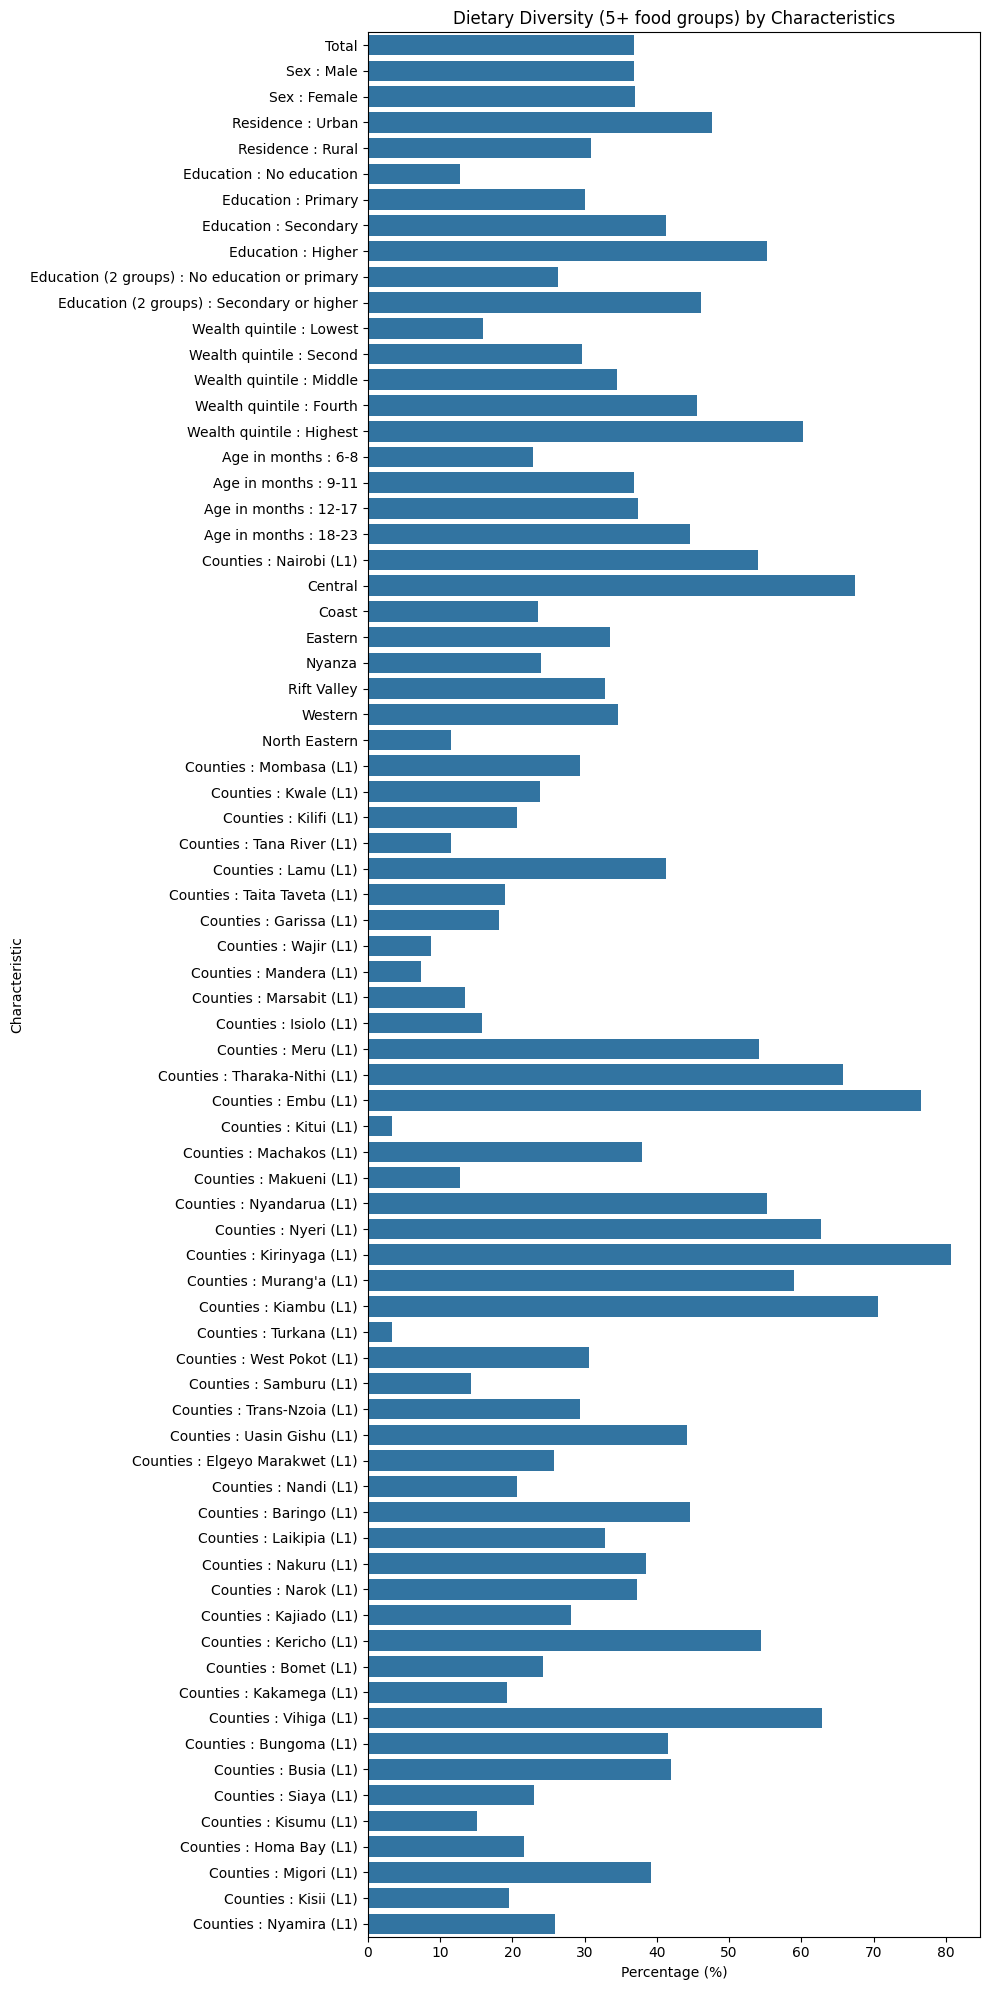

In [49]:
characteristics_data = data[['Characteristic', 'Children 6-23 months fed 5+ food groups']].copy()

plt.figure(figsize=(10, 20))
sns.barplot(x='Children 6-23 months fed 5+ food groups', 
            y='Characteristic', 
            data=characteristics_data)
plt.title('Dietary Diversity (5+ food groups) by Characteristics')
plt.xlabel('Percentage (%)')
plt.tight_layout()
plt.show()

In [57]:
summary_stats = data.groupby('Characteristic')[
    [
        'Breastfed children 6-23 months fed both 4+ food groups and the minimum meal frequency',
        'Children 6-23 months fed 5+ food groups',
        'Children 6-23 months fed the minimum meal frequency',
        'Children 6-23 months with 3 IYCF practices'
    ]
].mean()

print(summary_stats.head())

                       Breastfed children 6-23 months fed both 4+ food groups and the minimum meal frequency  \
Characteristic                                                                                                 
Age in months : 12-17                                               34.5                                       
Age in months : 18-23                                               46.7                                       
Age in months : 6-8                                                 22.5                                       
Age in months : 9-11                                                30.0                                       
Central                                                             57.2                                       

                       Children 6-23 months fed 5+ food groups  \
Characteristic                                                   
Age in months : 12-17                                     37.4   
Age in months : 1

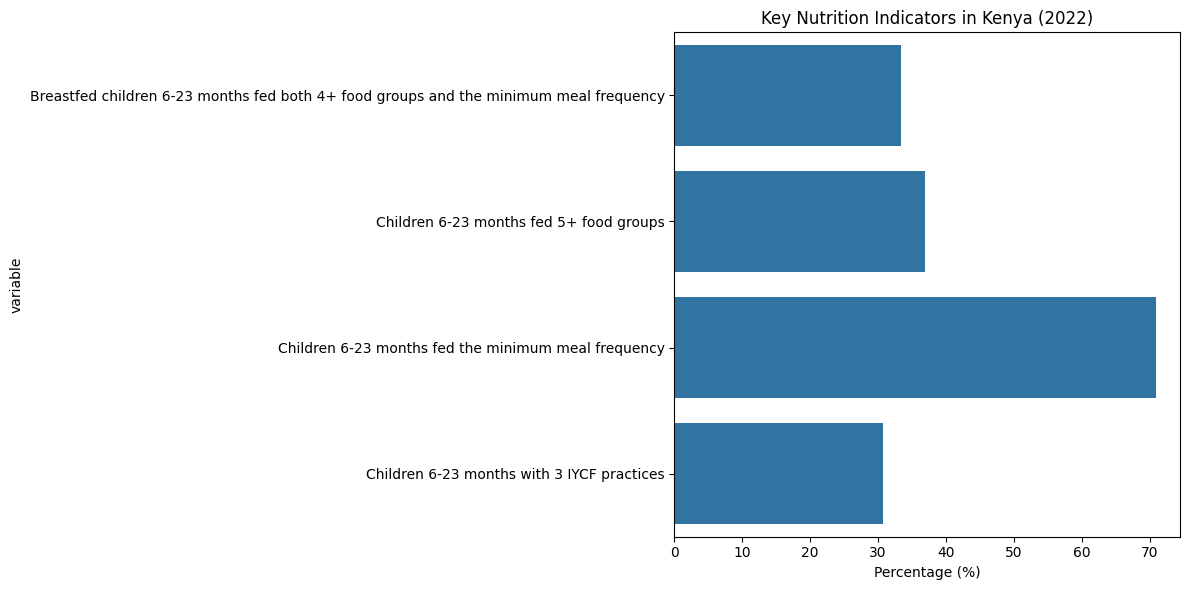

In [53]:
total_data = data[data['Characteristic'] == 'Total'].melt(
    id_vars=['Characteristic'],
    value_vars=[
        'Breastfed children 6-23 months fed both 4+ food groups and the minimum meal frequency',
        'Children 6-23 months fed 5+ food groups',
        'Children 6-23 months fed the minimum meal frequency',
        'Children 6-23 months with 3 IYCF practices'
    ]
)

plt.figure(figsize=(12, 6))
sns.barplot(data=total_data, x='value', y='variable')
plt.title('Key Nutrition Indicators in Kenya (2022)')
plt.xlabel('Percentage (%)')
plt.tight_layout()
plt.show()

In [55]:
education_data = data[data['Characteristic'].str.contains('Education', na=False)]
education_data

,Country,Survey,Characteristic,Breastfed children 6-23 months fed both 4+ food groups and the minimum meal frequency,Number of breastfed children 6-23 months,Number of breastfed children 6-23 months (unweighted),Non-breastfed children 6-23 months fed milk or milk products,Non-breastfed children 6-23 months with 3 IYCF practices,Number of nonbreastfed children 6-23 months,Number of nonbreastfed children 6-23 months (unweighted),Children 6-23 months fed 5+ food groups,Children 6-23 months fed the minimum meal frequency,Children 6-23 months with 3 IYCF practices,Number of all children 6-23 months,Number of all children 6-23 months (unweighted)
5,Kenya,2022 DHS,Education : No education,12.6,201.0,501.0,55.7,1.0,46.0,119.0,12.7,40.8,10.5,248.0,620.0
6,Kenya,2022 DHS,Education : Primary,29.2,750.0,770.0,41.7,14.6,163.0,175.0,30.0,70.9,26.6,914.0,945.0
7,Kenya,2022 DHS,Education : Secondary,33.0,701.0,678.0,51.2,23.9,179.0,166.0,41.3,72.4,31.2,880.0,844.0
8,Kenya,2022 DHS,Education : Higher,55.9,331.0,320.0,64.6,29.9,128.0,94.0,55.3,84.3,48.6,460.0,414.0
9,Kenya,2022 DHS,Education (2 groups) : No education or primary,25.7,952.0,1271.0,44.8,11.6,209.0,294.0,26.3,64.5,23.2,1161.0,1565.0
10,Kenya,2022 DHS,Education (2 groups) : Secondary or higher,40.4,1033.0,998.0,56.8,26.4,307.0,260.0,46.1,76.5,37.2,1340.0,1258.0


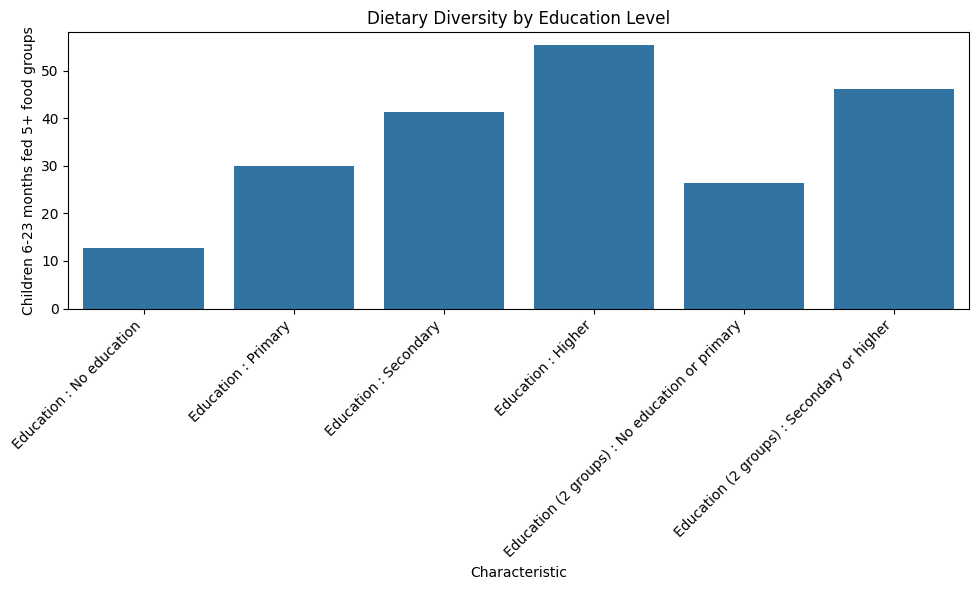

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(data=education_data, 
            x='Characteristic', 
            y='Children 6-23 months fed 5+ food groups')
plt.xticks(rotation=45, ha='right')
plt.title('Dietary Diversity by Education Level')
plt.tight_layout()
plt.show()